## 공공데이터 과제 #2
    1. 지하철 각 노선별 최대 하차 인원을 막대그래프로 표시하고, 하차인원 출력
        출근 시간대: 07:00~08:59
        사용 파일: subwaytime.csv 또는 subwaytime.xls
            - 07:00~07:59하차: index[11], 08:00~08:59하차: index [13]
        각 지하철 노선별 가장 많이 내리는 지하철 역 분석
            1호선, 2호선, 3호선, 4호선, 5호선, 6호선, 7호선
        하차 인원은 1,000단위로 콤마를 찍어서 구분할 것
        6개의 지하철 역을 막대 그래프로 표시
        Bar chart의 x축은 (노선+지하철 역 이름)을 표시하고, y축은 인원수를 표시
        반드시 다른 운영체제에서도 동작할 수 있도록 platform 모듈을 사용하여
            운영체제를 구분하여 한글 폰트 지정할 것

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import platform
# 지하철 시간대별 이용현황
df=pd.read_excel('subway.xls', sheet_name='지하철 시간대별 이용현황', header=[0, 1])
df

사용월                호선명                역ID  \
    Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1   
0              2022-06                1호선                150   
1              2022-06                1호선                151   
2              2022-06                1호선                152   
3              2022-06                1호선                153   
4              2022-06                1호선                154   
..                 ...                ...                ...   
610            2022-06                신림선               4407   
611            2022-06                신림선               4408   
612            2022-06                신림선               4409   
613            2022-06                신림선               4410   
614            2022-06                신림선               4411   

                  지하철역 04:00:00~04:59:59     05:00:00~05:59:59         \
    Unnamed: 3_level_1                승차  하차                승차     하차   
0                  서울역               646  24             8,433  7,694   
1                   시청               271   7             3,133  4,802   
2                   종각                91   9             4,007  3,960   
3                 종로3가               190  12             3,882  3,261   
4                 종로5가                34   0             1,730  3,909   
..                 ...               ...  ..               ...    ...   
610                 당곡                 0   0             1,061    118   
611                 신림                 2   1               651    153   
612                 서원                 2   1             1,287    151   
613            서울대벤처타운                10   3             3,314    166   
614           관악산(서울대)                 2   5               475    742   

    06:00:00~06:59:59          ... 23:00:00~23:59:59          \
                   승차      하차  ...                승차      하차   
0              12,608  46,963  ...            20,385  15,480   
1               3,321  23,621  ...             9,254   2,938   
2               3,682  22,533  ...            27,781   3,590   
3               3,570  14,038  ...            17,170   4,119   
4               2,986  16,406  ...             6,208   2,628   
..                ...     ...  ...               ...     ...   
610             2,650     704  ...               822   2,710   
611               853     488  ...               770   2,023   
612             2,552     513  ...               349   3,281   
613             5,162   1,676  ...             1,201   7,279   
614             1,258   1,712  ...               485   1,224   

    00:00:00~00:59:59        01:00:00~01:59:59     02:00:00~02:59:59     \
                   승차     하차                승차  하차                승차 하차   
0                 158  1,332                 1   4                 0  1   
1                  72    422                 0   2                 0  0   
2                 315    394                 0   1                 0  0   
3                 310    843                 3   3                 0  0   
4                  98    668                 0   0                 0  0   
..                ...    ...               ...  ..               ... ..   
610               156    637                 0   0                 0  0   
611               177    629                 0   1                 0  0   
612                68    782                 2   2                 0  0   
613               180  1,974                 1  40                 0  0   
614                90    412                 1  33                 0  0   

    03:00:00~03:59:59     
                   승차 하차  
0                   0  0  
1                   0  0  
2                   0  0  
3                   0  0  
4                   0  0  
..                ... ..  
610                 0  0  
611                 0  0  
612                 0  0  
613                 0  0  
614                 0  0  

[615 rows x 52 columns]

In [2]:
# 필요한 데이터 슬라이싱
timeDF=df.iloc[:,[1,3,11,13]]
timeDF.head()

,호선명,지하철역,07:00:00~07:59:59,08:00:00~08:59:59
,Unnamed: 1_level_1,Unnamed: 3_level_1,하차,하차
0,1호선,서울역,"100,397","201,687"
1,1호선,시청,"62,427","179,710"
2,1호선,종각,"95,376","235,160"
3,1호선,종로3가,"25,469","68,699"
4,1호선,종로5가,"41,304","96,113"


In [3]:
# 콤마 제거
timeDF[('07:00:00~07:59:59','하차')]=timeDF[('07:00:00~07:59:59','하차')].apply(lambda x:x.replace(',',''))
timeDF[('08:00:00~08:59:59','하차')]=timeDF[('08:00:00~08:59:59','하차')].apply(lambda x:x.replace(',',''))

C:\Users\User\AppData\Local\Temp\ipykernel_12176\1069837285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeDF[('07:00:00~07:59:59','하차')]=timeDF[('07:00:00~07:59:59','하차')].apply(lambda x:x.replace(',',''))
C:\Users\User\AppData\Local\Temp\ipykernel_12176\1069837285.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeDF[('08:00:00~08:59:59','하차')]=timeDF[('08:00:00~08:59:59','하차')].apply(lambda x:x.replace(',',''))


In [4]:
# 정수형으로 변환
timeDF=timeDF.astype({('07:00:00~07:59:59','하차'):'int64'})
timeDF=timeDF.astype({('08:00:00~08:59:59','하차'):'int64'})
timeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   (호선명, Unnamed: 1_level_1)   615 non-null    object
 1   (지하철역, Unnamed: 3_level_1)  615 non-null    object
 2   (07:00:00~07:59:59, 하차)     615 non-null    int64 
 3   (08:00:00~08:59:59, 하차)     615 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 19.3+ KB


In [5]:
row_sumDF=timeDF.sum(axis=1,numeric_only=True)
row_sumDF
timeDF.insert(2,value=row_sumDF,column='sum')

In [6]:
timeDF

,호선명,지하철역,sum,07:00:00~07:59:59,08:00:00~08:59:59
,Unnamed: 1_level_1,Unnamed: 3_level_1,,하차,하차
0,1호선,서울역,302084,100397,201687
1,1호선,시청,242137,62427,179710
2,1호선,종각,330536,95376,235160
3,1호선,종로3가,94168,25469,68699
4,1호선,종로5가,137417,41304,96113
...,...,...,...,...,...
610,신림선,당곡,7492,1981,5511
611,신림선,신림,2779,1075,1704
612,신림선,서원,2296,977,1319


In [7]:
# groupby로 호선명 묶어줌
lineGr=timeDF.groupby(by=('호선명','Unnamed: 1_level_1'))
lineGr

출근 시간대 1호선 최대 하차역은 종각역이고 하차인원은 330,536명 입니다.
출근 시간대 2호선 최대 하차역은 역삼역이고 하차인원은 479,969명 입니다.
출근 시간대 3호선 최대 하차역은 양재(서초구청)역이고 하차인원은 331,279명 입니다.
출근 시간대 4호선 최대 하차역은 충무로역이고 하차인원은 208,776명 입니다.
출근 시간대 5호선 최대 하차역은 여의도역이고 하차인원은 352,602명 입니다.
출근 시간대 6호선 최대 하차역은 공덕역이고 하차인원은 134,342명 입니다.
출근 시간대 7호선 최대 하차역은 가산디지털단지역이고 하차인원은 486,420명 입니다.


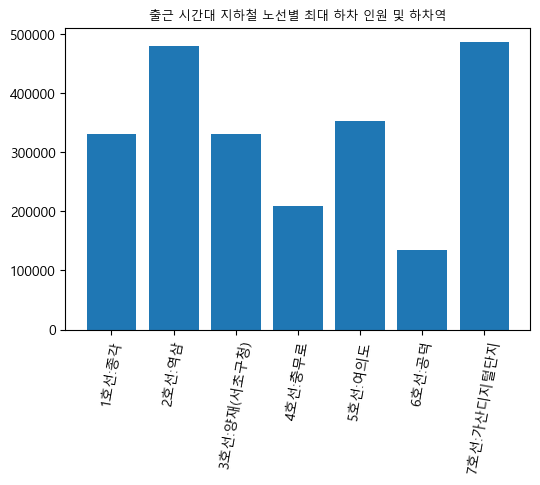

In [10]:
def draw_graph():
    line_name=list(lineGr.groups.keys())
    x_label=[]
    y_label=[]
    for i in range(7):
        line=lineGr.get_group(line_name[i])
        max_line,max_station=df.iloc[line['sum'].idxmax(),[1, 3]]
        x_label.append(max_line+':'+max_station)
        y_label.append(line['sum'].max())
        print('출근 시간대 {0} 최대 하차역은 {1}역이고 하차인원은 {2:,}명 입니다.'.format(max_line,max_station,line['sum'].max()))
    if(platform.system() == 'Windows'):
        plt.rc('font', family = 'Malgun Gothic')
    else:
        plt.rc('font', family = 'AppleGothic')

    plt.figure(dpi=100)
    plt.bar(x_label,y_label)
    plt.title('출근 시간대 지하철 노선별 최대 하차 인원 및 하차역',size=9)
    plt.xticks(rotation=80)
    plt.show()
draw_graph()